In [23]:
import requests

url = "https://google-translate1.p.rapidapi.com/language/translate/v2/languages"

headers = {
	"Accept-Encoding": "application/gzip",
	"X-RapidAPI-Key": "03f71a38a2mshad3fc617d2423ffp105086jsnbd8b6f30df08",
	"X-RapidAPI-Host": "google-translate1.p.rapidapi.com"
}

response = requests.get(url, headers=headers)

print(response.json())

{'data': {'languages': [{'language': 'af'}, {'language': 'ak'}, {'language': 'am'}, {'language': 'ar'}, {'language': 'as'}, {'language': 'ay'}, {'language': 'az'}, {'language': 'be'}, {'language': 'bg'}, {'language': 'bho'}, {'language': 'bm'}, {'language': 'bn'}, {'language': 'bs'}, {'language': 'ca'}, {'language': 'ceb'}, {'language': 'ckb'}, {'language': 'co'}, {'language': 'cs'}, {'language': 'cy'}, {'language': 'da'}, {'language': 'de'}, {'language': 'doi'}, {'language': 'dv'}, {'language': 'ee'}, {'language': 'el'}, {'language': 'en'}, {'language': 'eo'}, {'language': 'es'}, {'language': 'et'}, {'language': 'eu'}, {'language': 'fa'}, {'language': 'fi'}, {'language': 'fr'}, {'language': 'fy'}, {'language': 'ga'}, {'language': 'gd'}, {'language': 'gl'}, {'language': 'gn'}, {'language': 'gom'}, {'language': 'gu'}, {'language': 'ha'}, {'language': 'haw'}, {'language': 'he'}, {'language': 'hi'}, {'language': 'hmn'}, {'language': 'hr'}, {'language': 'ht'}, {'language': 'hu'}, {'languag

Data Visualizations

In [24]:
pip install dash

In [25]:
import pandas as pd
import requests

# Fetch supported languages
def fetch_languages():
    url = "https://google-translate1.p.rapidapi.com/language/translate/v2/languages"
    headers = {
        "Accept-Encoding": "application/gzip",
        "X-RapidAPI-Key": "03f71a38a2mshad3fc617d2423ffp105086jsnbd8b6f30df08",
        "X-RapidAPI-Host": "google-translate1.p.rapidapi.com"
    }
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        return [lang['language'] for lang in response.json()['data']['languages']]
    else:
        return []

# Create DataFrame
df = pd.DataFrame({
    "Language Code": fetch_languages()
})

# Display DataFrame
print(df)


    Language Code
0              af
1              ak
2              am
3              ar
4              as
..            ...
131            yo
132            zh
133         zh-CN
134         zh-TW
135            zu

[136 rows x 1 columns]


In [7]:
pip install dash

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 61.0 MB/s eta 0:00:00


In [8]:

import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import requests

# Fetch supported languages
def fetch_languages():
    url = "https://google-translate1.p.rapidapi.com/language/translate/v2/languages"
    headers = {
        "Accept-Encoding": "application/gzip",
        "X-RapidAPI-Key": "03f71a38a2mshad3fc617d2423ffp105086jsnbd8b6f30df08",
        "X-RapidAPI-Host": "google-translate1.p.rapidapi.com"
    }
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        return response.json()['data']['languages']
    else:
        return []

# Initialize Dash app
app = dash.Dash(__name__)

# Define app layout
app.layout = html.Div([
    html.H1("Supported Languages"),
    dcc.Dropdown(
        id='language-dropdown',
        options=[{'label': lang['language'], 'value': lang['language']} for lang in fetch_languages()],
        multi=True,
        placeholder="Select languages"
    ),
    html.Div(id='selected-languages')
])

# Define callback to display selected languages
@app.callback(
    Output('selected-languages', 'children'),
    [Input('language-dropdown', 'value')]
)
def display_selected_languages(selected_languages):
    if selected_languages:
        return html.Div([
            html.H3("Selected Languages:"),
            html.Ul([html.Li(lang) for lang in selected_languages])
        ])
    else:
        return html.Div()

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

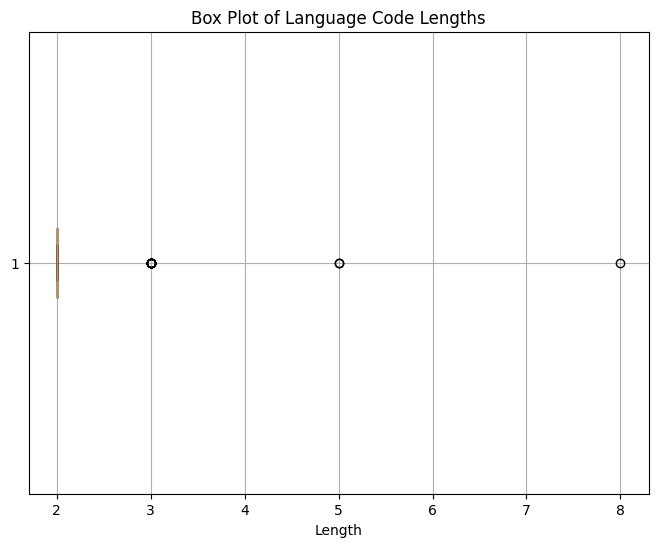

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import requests

# Fetch supported languages
def fetch_languages():
    url = "https://google-translate1.p.rapidapi.com/language/translate/v2/languages"
    headers = {
        "Accept-Encoding": "application/gzip",
        "X-RapidAPI-Key": "03f71a38a2mshad3fc617d2423ffp105086jsnbd8b6f30df08",
        "X-RapidAPI-Host": "google-translate1.p.rapidapi.com"
    }
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        return [lang['language'] for lang in response.json()['data']['languages']]
    else:
        return []

# Create DataFrame
languages = fetch_languages()
df = pd.DataFrame({
    "Language Code": languages
})

# Calculate lengths of language codes
df['Code Length'] = df['Language Code'].apply(len)

# Data visualization
plt.figure(figsize=(8, 6))
plt.boxplot(df['Code Length'], vert=False)
plt.title('Box Plot of Language Code Lengths')
plt.xlabel('Length')
plt.grid(True)
plt.show()


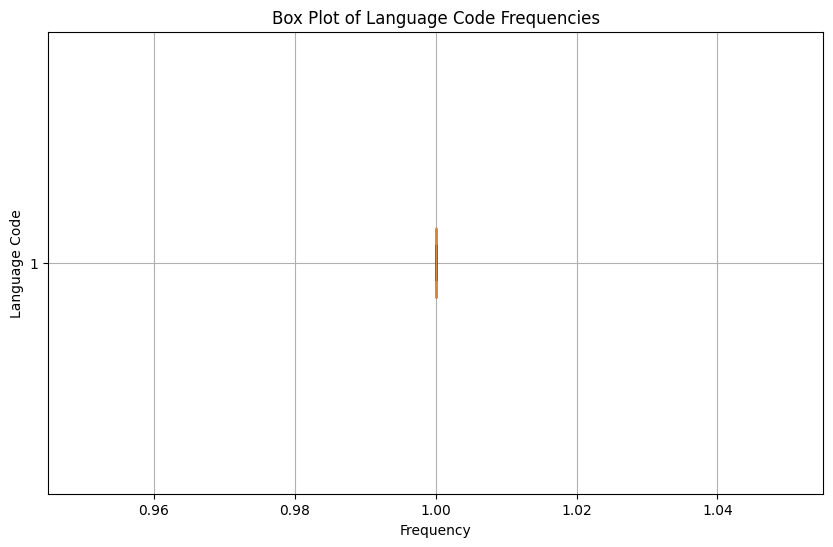

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import requests

# Fetch supported languages
def fetch_languages():
    url = "https://google-translate1.p.rapidapi.com/language/translate/v2/languages"
    headers = {
        "Accept-Encoding": "application/gzip",
        "X-RapidAPI-Key": "03f71a38a2mshad3fc617d2423ffp105086jsnbd8b6f30df08",
        "X-RapidAPI-Host": "google-translate1.p.rapidapi.com"
    }
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        return [lang['language'] for lang in response.json()['data']['languages']]
    else:
        return []

# Create DataFrame
languages = fetch_languages()
df = pd.DataFrame({
    "Language Code": languages
})

# Calculate counts of each language code
language_counts = df['Language Code'].value_counts()

# Data visualization
plt.figure(figsize=(10, 6))
plt.boxplot(language_counts, vert=False)
plt.title('Box Plot of Language Code Frequencies')
plt.xlabel('Frequency')
plt.ylabel('Language Code')
plt.grid(True)
plt.show()


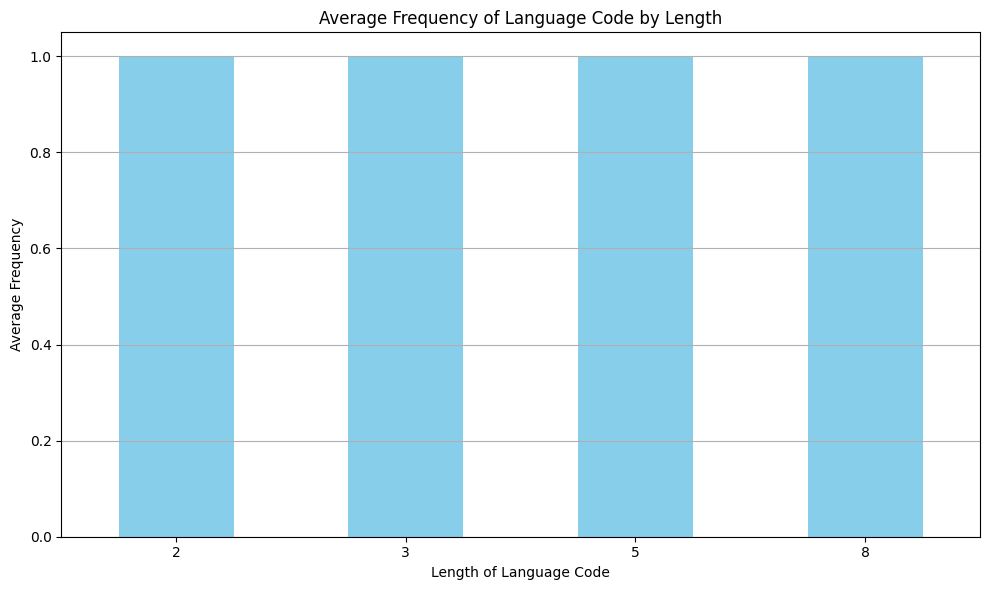

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import requests

# Fetch supported languages
def fetch_languages():
    url = "https://google-translate1.p.rapidapi.com/language/translate/v2/languages"
    headers = {
        "Accept-Encoding": "application/gzip",
        "X-RapidAPI-Key": "03f71a38a2mshad3fc617d2423ffp105086jsnbd8b6f30df08",
        "X-RapidAPI-Host": "google-translate1.p.rapidapi.com"
    }
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        return [lang['language'] for lang in response.json()['data']['languages']]
    else:
        return []

# Create DataFrame
languages = fetch_languages()
df = pd.DataFrame({
    "Language Code": languages
})

# Calculate lengths of language codes
df['Code Length'] = df['Language Code'].apply(len)

# Calculate frequency of each language code
language_counts = df['Language Code'].value_counts()
df['Frequency'] = df['Language Code'].map(language_counts)

# Calculate average frequency for each length category
avg_frequency_by_length = df.groupby('Code Length')['Frequency'].mean()

# Data visualization
plt.figure(figsize=(10, 6))
avg_frequency_by_length.plot(kind='bar', color='skyblue')
plt.title('Average Frequency of Language Code by Length')
plt.xlabel('Length of Language Code')
plt.ylabel('Average Frequency')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
